<a href="https://colab.research.google.com/github/adinwritescode/FFTBall/blob/main/Playoff_Projection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

For those of you who havent seen this before, just hover over each block below and click the "Play" button.



## To Do

1. Weight recent weeks more heavily
2. Performance vs Weekly Average?

Current wins data includes up to week 10

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import clear_output


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('FFTBall All-Time Records').worksheet('Total Points Accumulated 2017-2021')
rows = worksheet.get("B69:K82")


df = pd.DataFrame.from_records(rows).dropna()
df.columns = worksheet.get("B1:K1")
df = df.astype(float)

In [ ]:
overall_avgs = df.mean(axis=0)
second_half_avgs = df.iloc[int(df["Manager1"].size / 2):].mean(axis=0)
avgs = .5*overall_avgs + .5*second_half_avgs
std_devs = df.std(axis=0)

games_left = [#["Manager1", "Manager8"], ["Manager6", "Manager4"], ["Manager7", "Manager2"], ["Manager5", "Manager10"], ["Manager9", "Manager3"], # week 11
              #["Manager1", "Manager9"], ["Manager8", "Manager7"], ["Manager10", "Manager2"], ["Manager5", "Manager4"], ["Manager6", "Manager3"], # 12
              #["Manager1", "Manager6"], ["Manager2", "Manager4"], ["Manager7", "Manager10"], ["Manager5", "Manager3"], ["Manager9", "Manager8"], # 13
              ["Manager1", "Manager5"], ["Manager6", "Manager7"], ["Manager9", "Manager2"], ["Manager3", "Manager10"], ["Manager4", "Manager8"]] # 14

east = ["Manager4", "Manager2", "Manager7", "Manager10", "Manager5"]
west = ["Manager1", "Manager6", "Manager3", "Manager9", "Manager8"]
league = east + west

def simulate(N = 10000):
  seeds = {owner: [] for owner in league}

  for _ in range(N):
    init_wins = {"Manager1": 8, "Manager2": 8, "Manager3": 6, "Manager4": 8, "Manager5": 2, "Manager6": 9, "Manager7": 3, "Manager8": 7, "Manager9": 9, "Manager10": 5}

    init_pts = df.sum(axis=0)
    for [t1, t2] in games_left:
      p1 = np.random.normal(avgs[t1], std_devs[t1])
      p2 = np.random.normal(avgs[t2], std_devs[t2])
      init_pts[t1] += p1
      init_pts[t2] += p2

      if (p1 > p2):
        init_wins[t1] += 1
      elif (p2 > p1):
        init_wins[t2] += 1
      else:
        print(p1, p2)
        print("Wow a tie happened that's so unlucky")

    wins = {k: v for k, v in sorted(init_wins.items(), key=lambda item: (item[1], init_pts[item[0]]), reverse=True)}

    W = E = 0
    for i, standing in enumerate(wins.items()):
      [name, finish] = standing

      if name in west and not W:
        if E:
          seeds[name].append(2)
        else:
          seeds[name].append(1)
        W = 1
      elif name in east and not E:
        if W:
          seeds[name].append(2)
        else:
          seeds[name].append(1)
        E = 1
      elif W and E:
        seeds[name].append(i + 1)
      else:
        seeds[name].append(i+2)
      
  return seeds


Showing projected results for Manager4
Best Possible Seed: 1 with probability 0.9%
Worst Possible Seed: 5 with probability 3.6%


Manager4 makes the playoffs 100.0% of the time and misses the playoffs 0.0% of the time
The most likely outcome is having the 2 seed, which happens 95.2% of the time.




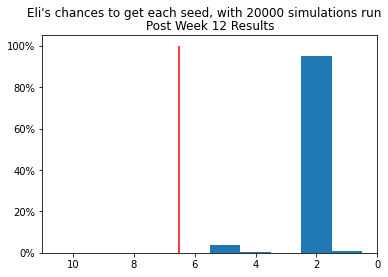


Showing projected results for Manager2
Best Possible Seed: 2 with probability 3.9%
Worst Possible Seed: 6 with probability 2.0%


Manager2 makes the playoffs 100.0% of the time and misses the playoffs 0.0% of the time
The most likely outcome is having the 5 seed, which happens 92.8% of the time.




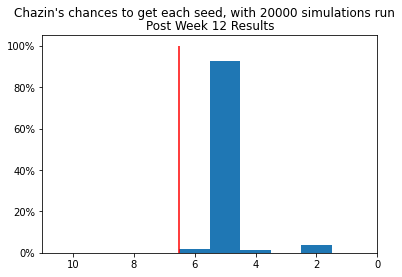


Showing projected results for Manager7
Best Possible Seed: 9 with probability 100.0%
Worst Possible Seed: 9 with probability 100.0%


Manager7 makes the playoffs 0.0% of the time and misses the playoffs 100.0% of the time
The most likely outcome is having the 9 seed, which happens 100.0% of the time.




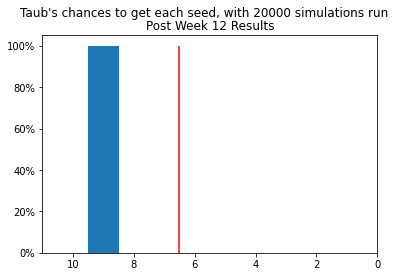


Showing projected results for Manager10
Best Possible Seed: 7 with probability 46.0%
Worst Possible Seed: 8 with probability 54.0%


Manager10 makes the playoffs 0.0% of the time and misses the playoffs 100.0% of the time
The most likely outcome is having the 8 seed, which happens 54.0% of the time.




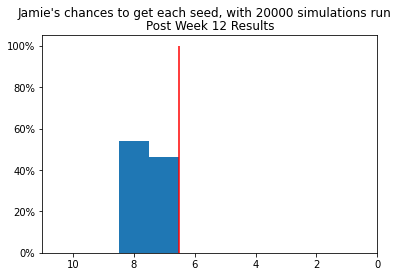


Showing projected results for Manager5
Best Possible Seed: 10 with probability 100.0%
Worst Possible Seed: 10 with probability 100.0%


Manager5 makes the playoffs 0.0% of the time and misses the playoffs 100.0% of the time
The most likely outcome is having the 10 seed, which happens 100.0% of the time.




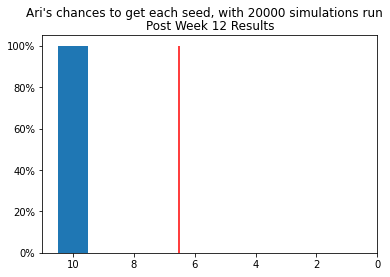


Showing projected results for Manager1
Best Possible Seed: 3 with probability 6.0%
Worst Possible Seed: 5 with probability 1.6%


Manager1 makes the playoffs 100.0% of the time and misses the playoffs 0.0% of the time
The most likely outcome is having the 4 seed, which happens 92.4% of the time.




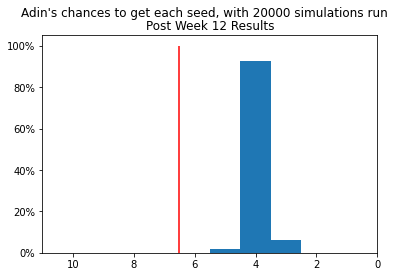


Showing projected results for Manager6
Best Possible Seed: 1 with probability 12.5%
Worst Possible Seed: 4 with probability 6.0%


Manager6 makes the playoffs 100.0% of the time and misses the playoffs 0.0% of the time
The most likely outcome is having the 3 seed, which happens 81.5% of the time.




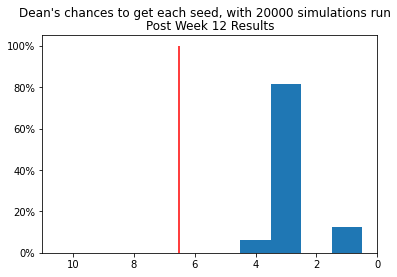


Showing projected results for Manager3
Best Possible Seed: 6 with probability 43.0%
Worst Possible Seed: 8 with probability 46.0%


Manager3 makes the playoffs 43.0% of the time and misses the playoffs 57.0% of the time
The most likely outcome is having the 8 seed, which happens 46.0% of the time.




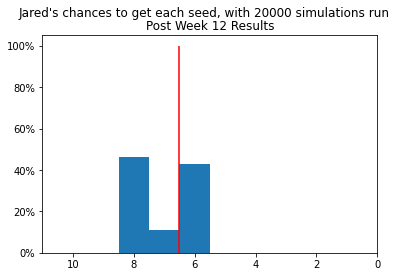


Showing projected results for Manager9
Best Possible Seed: 1 with probability 86.6%
Worst Possible Seed: 3 with probability 12.5%


Manager9 makes the playoffs 100.0% of the time and misses the playoffs 0.0% of the time
The most likely outcome is having the 1 seed, which happens 86.6% of the time.




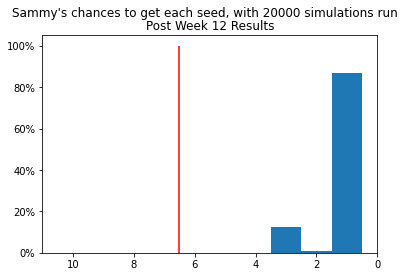


Showing projected results for Manager8
Best Possible Seed: 5 with probability 2.0%
Worst Possible Seed: 7 with probability 43.0%


Manager8 makes the playoffs 57.0% of the time and misses the playoffs 43.0% of the time
The most likely outcome is having the 6 seed, which happens 55.0% of the time.




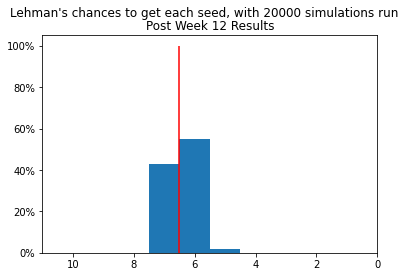

In [ ]:
N = 20000
results = simulate(N)


for owner in league:

  print("\nShowing projected results for", owner)
  hist_data = results[owner]

  fig, axs = plt.subplots()
  # We can set the number of bins with the *bins* keyword argument.
  counts, bins, bars = axs.hist(hist_data, bins=np.arange(1,12)-.5, weights=np.ones(N) / N)

  worst = max(hist_data)
  best =  min(hist_data)
  print("Best Possible Seed:", best, "with probability", '{:.1%}'.format(counts[best - 1]))
  print("Worst Possible Seed:", worst, "with probability", '{:.1%}'.format(counts[worst - 1]))
  print("\n")
  print(owner, "makes the playoffs", '{:.1%}'.format(sum(counts[:6])), "of the time and misses the playoffs", '{:.1%}'.format(sum(counts[6:])), "of the time")
  most_likely = max(counts)
  print("The most likely outcome is having the", list(counts).index(most_likely) + 1, "seed, which happens", '{:.1%}'.format(most_likely), "of the time.\n\n")


  axs.invert_xaxis()
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.suptitle(f"{owner}'s chances to get each seed, with {N} simulations run")
  plt.title("Post Week 12 Results")
  plt.vlines(x=6.5, ymin=0, ymax=1, color = 'r')
  plt.show()
